In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
import seaborn as sns

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [7]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [8]:
df.describe()

T          TM          Tm          SLP           H  \
count  731.000000  731.000000  731.000000   731.000000  731.000000   
mean    25.556908   32.231874   19.273598  1008.196854   64.134063   
std      7.286760    6.852548    7.454202     7.564601   15.460460   
min      6.700000    9.800000    0.000000   991.500000   20.000000   
25%     18.850000   27.550000   12.000000  1001.300000   55.000000   
50%     27.700000   34.100000   21.000000  1008.500000   66.000000   
75%     31.200000   36.900000   25.900000  1015.000000   75.000000   
max     38.500000   45.500000   32.700000  1023.200000   98.000000   

               VV           V          VM      PM 2.5  
count  731.000000  731.000000  731.000000  730.000000  
mean     1.891929    6.630369   15.696580  107.929150  
std      0.686446    3.967064    7.654019   82.576607  
min      0.300000    0.400000    1.900000    0.000000  
25%      1.400000    3.500000   11.100000   43.583333  
50%      1.900000    6.300000   14.800000   81.729167  
75%      2.400000    9.100000   18.300000  153.934375  
max      5.800000   24.400000   57.600000  404.500000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
T         731 non-null float64
TM        731 non-null float64
Tm        731 non-null float64
SLP       731 non-null float64
H         731 non-null float64
VV        731 non-null float64
V         731 non-null float64
VM        731 non-null float64
PM 2.5    730 non-null float64
dtypes: float64(9)
memory usage: 51.5 KB


In [14]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [17]:
df.shape

(731, 9)

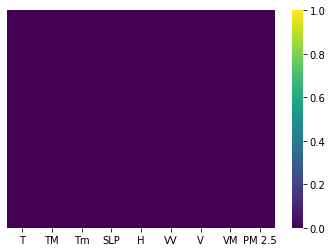

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=True)

In [24]:
df.dropna(inplace=True)

C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\A-Rajesh.Gaikwad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


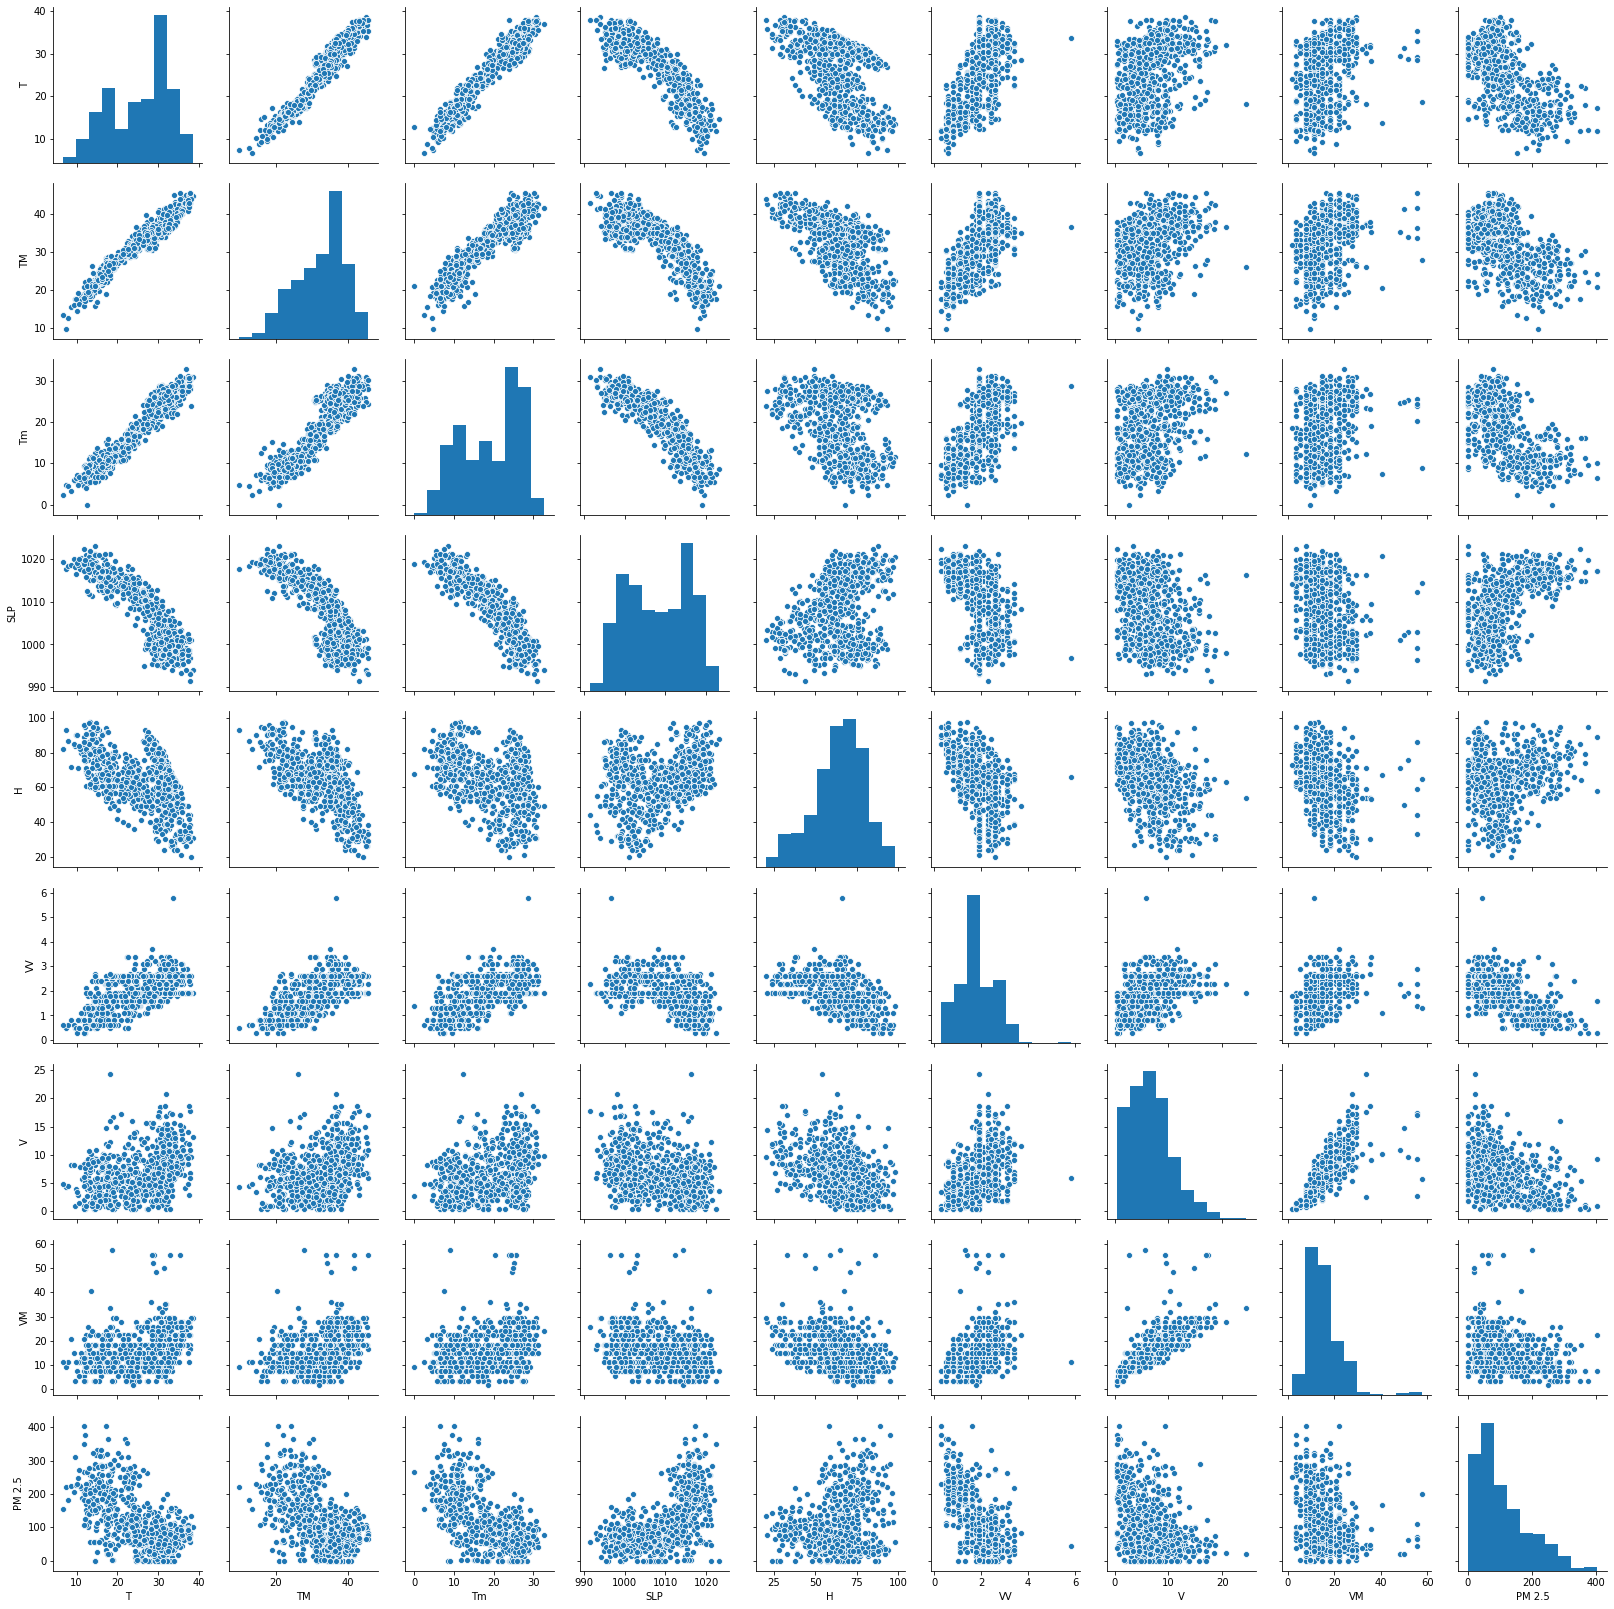

In [19]:
sns.pairplot(df)

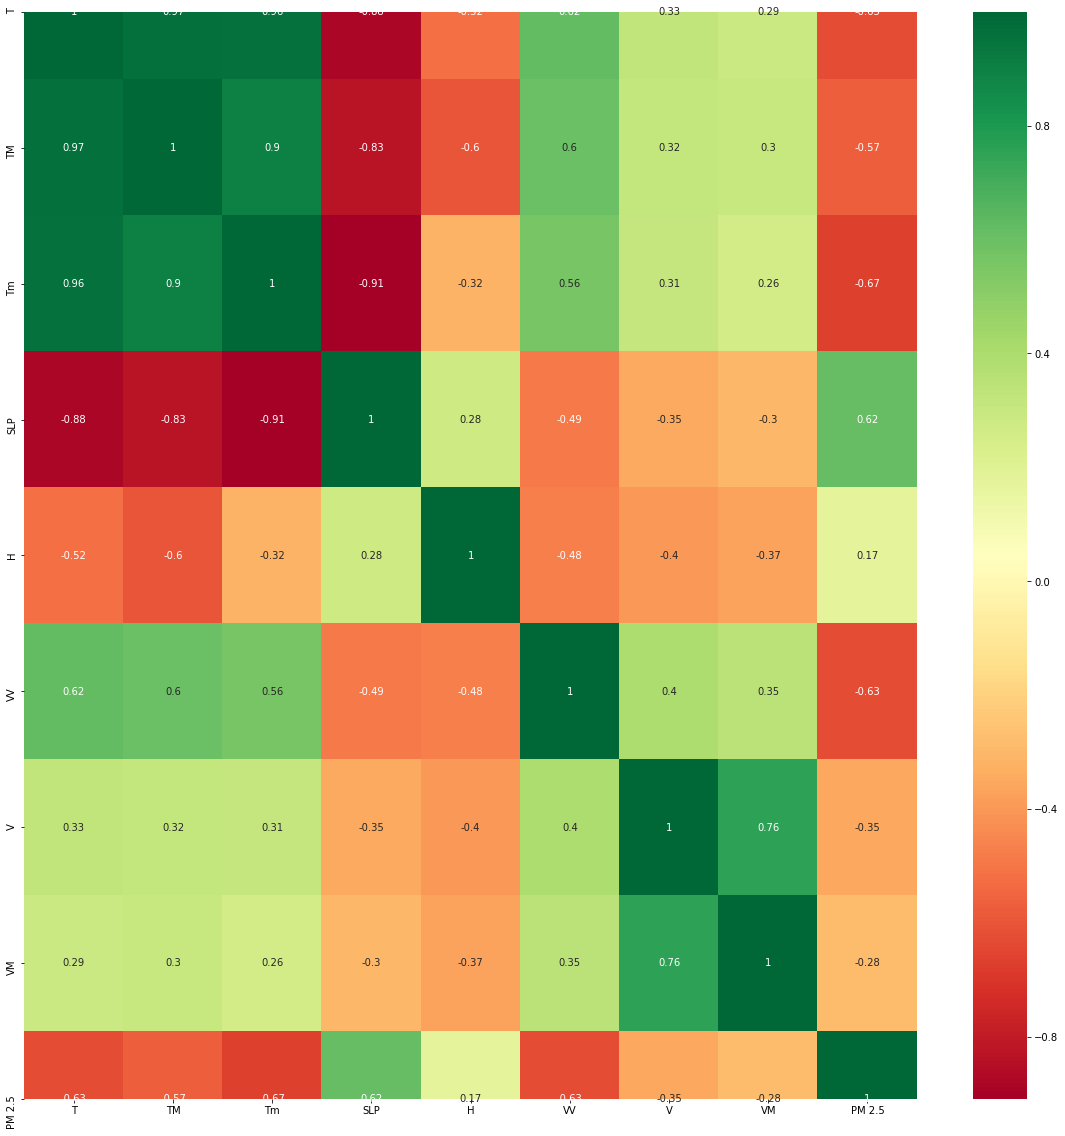

In [20]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X
y

0      219.720833
1      182.187500
2      154.037500
3      223.208333
4      200.645833
          ...    
726    288.416667
727    256.833333
728    169.000000
729    186.041667
730    185.583333
Name: PM 2.5, Length: 730, dtype: float64

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [29]:

print(model.feature_importances_)

[0.15579951 0.09568425 0.18426972 0.13726284 0.08202634 0.25121268
 0.05354942 0.04019524]


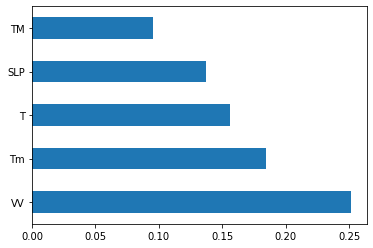

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

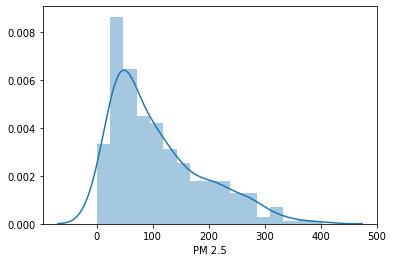

In [32]:
sns.distplot(y)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.6007706404750855


In [36]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5316188612878152


In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [38]:
score.mean()

0.46724362258523333

### Model Evaluation

In [39]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
T       2.639490
TM      0.519979
Tm     -7.598118
SLP     0.493220
H      -0.837064
VV    -50.430135
V      -2.754178
VM     -0.039266

In [40]:
prediction=regressor.predict(X_test)

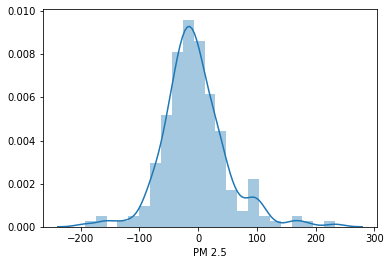

In [44]:
sns.distplot(y_test-prediction)

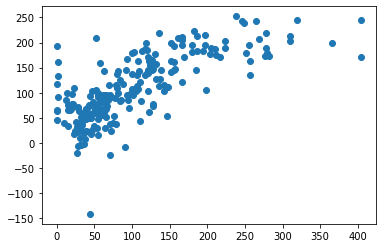

In [42]:
plt.scatter(y_test,prediction)

## Evaluation metrics

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.28335537132943
MSE: 3057.6641286741387
RMSE: 55.296149311449696


In [47]:
import pickle

In [48]:
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)